# Topic Modelling

## Install & Import Library
Jika anda ingin menjalankan notebook secara offline seperti Jupyter Notebook, pastikan perangkat anda sudah terinstall library yang dibutuhkan. Jika anda ingin menjalankan notebook secara online seperti Google Colaboratory, pastikan notebook tersebut sudah terinstall library yang dibutuhkan. Library yang dibutuhkan dalam proyek ini, yaitu:
- Scrapy
- OS
- Regex
- Pandas
- Matplotlib
- NLTK
- Sklearn
- Sastrawi
- Wordcloud

In [1]:
!pip install Sastrawi
!pip install Scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 264 kB 8.4 MB/s 
     |████████████████████████████████| 4.0 MB 48.7 MB/s 
     |████████████████████████████████| 93 kB 2.1 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 3.1 MB 48.4 MB/s 
     |████████████████████████████████| 47 kB 4.7 MB/s 
     |████████████████████████████████| 251 kB 55.9 MB/s 
     |████████████████████████████████| 74 kB 3.1 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11516 sha256=66363e259bcd97fea3ac0500660e137e2cb9ace6e59593cd13e4fb509613f1bb
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa69a339198e08bb63b7da2c45933a3428b29ec454
Successfully built Py

In [2]:
# Import Library
import os
import regex as re
import pandas as pd
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Install NLTK Corpus
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Crawling Data

## Create Scrapy Project

Pada bagian ini digunakan untuk membuat proyek library Scrapy dan memindah posisi direktori. Proyek library Scrapy diberi nama crawlproject. Posisi direktori dipindah ke crawlproject/crawlproject/spiders

In [3]:
# Membuat proyek library Scrapy
!scrapy startproject crawlproject

New Scrapy project 'crawlproject', using template directory '/usr/local/lib/python3.7/dist-packages/scrapy/templates/project', created in:
    /content/crawlproject

You can start your first spider with:
    cd crawlproject
    scrapy genspider example example.com


In [4]:
# Melihat posisi direktori saat ini
os.getcwd()

'/content'

In [5]:
# Mengubah posisi direktori saat ini ke crawlproject/crawlproject/spiders
# Fungsinya agar bisa menjalankan file proyek library Scrapy
os.chdir('crawlproject/crawlproject/spiders')
os.getcwd()

'/content/crawlproject/crawlproject/spiders'

## Crawling Link PTA

Pada bagian ini digunakan untuk membuat dan menjalankan program python. Program tersebut digunakan untuk melakukan _crawling_ 40 link tugas akhir teknik manajemen. Untuk melakukan _crawling_ menggunakan library scrapy.

In [6]:
%%writefile -a link.py
# Membuat file link.py
# File link.py digunakan untuk crawling link tugas akhir
import scrapy

class QuotesSpider(scrapy.Spider):
    name = "quotes"

    def start_requests(self):
        start_urls = ['https://pta.trunojoyo.ac.id/c_search/byprod/10/1']
        for i in range (2,49):
            tambah = 'https://pta.trunojoyo.ac.id/c_search/byprod/10/'+ str(i)
            start_urls.append(tambah)
        for url in start_urls:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        for i in range(1, 6):
            yield {
                'link':response.css('#content_journal > ul > li:nth-child(' +str(i)+ ') > div:nth-child(3) > a::attr(href)').extract()
            }

Writing link.py


In [7]:
# Menjalankan file link.py untuk melakukan proses crawling link tugas akhir
# Hasil akan disimpan dalam file link.csv
# File link.csv digunakan untuk melakukan crawling detail tugas akhir
!scrapy runspider link.py -o link.csv

2022-06-30 13:28:16 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: crawlproject)
2022-06-30 13:28:16 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.7.13 (default, Apr 24 2022, 01:04:09) - [GCC 7.5.0], pyOpenSSL 22.0.0 (OpenSSL 3.0.3 3 May 2022), cryptography 37.0.2, Platform Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
2022-06-30 13:28:16 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'crawlproject',
 'NEWSPIDER_MODULE': 'crawlproject.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['crawlproject.spiders']}
2022-06-30 13:28:16 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2022-06-30 13:28:16 [scrapy.extensions.telnet] INFO: Telnet Password: 436d5ea96a5c1576
2022-06-30 13:28:16 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 

## Crawling Detail PTA

Pada bagian ini digunakan untuk membuat dan menjalankan program python. Program tersebut digunakan untuk melakukan crawling 40 detail tugas akhir manajemen. Untuk melakukan crawling menggunakan library scrapy.

In [8]:
%%writefile -a detail.py
# Membuat file detail.py
# File detail.py digunakan untuk crawling detail tugas akhir
import scrapy
import pandas as pd

class QuotesSpider(scrapy.Spider):
    name = "quotes"

    def start_requests(self):
        dataCSV = pd.read_csv('link.csv')
        indexData = dataCSV.iloc[:, [0]].values
        arrayData = []
        for i in indexData:
            ambil = i[0]
            arrayData.append(ambil)
        for url in arrayData:
            yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        yield {
            'judul': response.css('#content_journal > ul > li > div:nth-child(2) > a::text').extract(),
            'penulis': response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(2) > span::text').extract(),
            'pembimbing_1': response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(3) > span::text').extract(),
            'pembimbing_2': response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(4) > span::text').extract(),
            'abstrak': response.css('#content_journal > ul > li > div:nth-child(4) > div:nth-child(2) > p::text').extract()
        }

Writing detail.py


In [9]:
# Menjalankan file detail.py untuk melakukan proses crawling detail tugas akhir
# Hasil akan disimpan dalam file detail.csv
# File detail.csv digunakan sebagai dataset utama yang diolah dalam proyek ini
!scrapy runspider detail.py -o detail.csv

/usr/local/lib/python3.7/dist-packages/scrapy/spiderloader.py:40: UserWarning: There are several spiders with the same name:

  QuotesSpider named 'quotes' (in crawlproject.spiders.detail)

  QuotesSpider named 'quotes' (in crawlproject.spiders.link)

  This can cause unexpected behavior.
  category=UserWarning,
2022-06-30 13:28:31 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: crawlproject)
2022-06-30 13:28:31 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.7.13 (default, Apr 24 2022, 01:04:09) - [GCC 7.5.0], pyOpenSSL 22.0.0 (OpenSSL 3.0.3 3 May 2022), cryptography 37.0.2, Platform Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
2022-06-30 13:28:31 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'crawlproject',
 'NEWSPIDER_MODULE': 'crawlproject.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['crawlproject.spiders']}
2022-06-30 13:28:31 [scrapy.u

# Preprocessing Data

## Read Dataset

Pada bagian ini digunakan untuk membaca dataset. Dataset akan dibaca dan diubah menjadi dataframe agar lebih mudah diolah. Hanya kolom abstrak yang diambil untuk diolah.

In [10]:
# Membaca dataset dan hanya mengambil kolom
docs = pd.read_csv('detail.csv', usecols=['abstrak'])

## Cleaning & Tokenizing
Pada bagian ini digunakan untuk membersihkan dan melakukan tokenisasi data yang sudah dicrawling. Fungsi dari membersihkan data adalah membuang tanda baca dan membuatnya menjadi _lowercase_. Kemudian dilakukan tokenisasi untuk memecah kata.

In [11]:
# Membersihkan dan melakukan tokenisasi data yang sudah dicrawling
docs['abstrak'] = docs['abstrak'].apply(
    lambda x: word_tokenize(re.sub('[^a-zA-Z]', ' ', str(x).lower())))
docs['abstrak']

0      [sistem, informasi, akademik, siakad, merupaka...
1      [pemilihan, supplier, merupakan, salah, satu, ...
2      [penjadwalan, kuliah, di, perguruan, tinggi, m...
3      [web, server, adalah, sebuah, perangkat, lunak...
4      [setiap, perusahaan, mengharapkan, adanya, hub...
                             ...                        
235    [seiring, dengan, perkembangan, otomotif, fasi...
236    [global, positioning, system, gps, merupakan, ...
237    [manajemen, proyek, merupakan, upaya, untuk, m...
238    [buku, merupakan, sumber, informasi, semua, as...
239    [perkembangan, teknologi, informasi, dalam, du...
Name: abstrak, Length: 240, dtype: object

## Stopwords
Pada bagian ini digunakan untuk menghapus kata-kata yang termasuk _stopword_. Kata-kata yang termasuk _stopword_ tidak mengandung arti spesifik sehingga harus dihapus sebelum diolah. Di dalam proyek ini akan dilakukan penghapusan kata-kata bahasa indonesia dan inggris yang termasuk _stopword_.

### Stopwords Dictionary
<a href="https://gist.github.com/sebleier/554280" title="NLTK's list of english stopwords">Kamus Stopword Bahasa Inggris</a>

<a href="https://github.com/stopwords-iso/stopwords-id/blob/master/raw/indonesian-stopwords-complete.txt" title="indonesian-stopwords-complete.txt">Kamus Stopword Bahasa Indonesia</a>

In [12]:
# Menghapus kata-kata bahasa indonesia dan inggris yang termasuk stopword
stopwords_dictionary = stopwords.words('indonesian')
docs['abstrak_no_sw'] = docs['abstrak'].apply(
    lambda doc: [d for d in doc if d not in stopwords_dictionary])
docs['abstrak_no_sw']

0      [sistem, informasi, akademik, siakad, sistem, ...
1      [pemilihan, supplier, salah, isu, pemilihan, s...
2      [penjadwalan, kuliah, perguruan, kompleks, per...
3      [web, server, perangkat, lunak, server, berfun...
4      [perusahaan, mengharapkan, hubungan, pelanggan...
                             ...                        
235    [seiring, perkembangan, otomotif, fasilitas, j...
236    [global, positioning, system, gps, sistem, nav...
237    [manajemen, proyek, upaya, merencanakan, menga...
238    [buku, sumber, informasi, aspek, kehidupan, pe...
239    [perkembangan, teknologi, informasi, dunia, pe...
Name: abstrak_no_sw, Length: 240, dtype: object

## Stemming
Pada bagian ini digunakan untuk stemming. Stemming adalah sebuah metode yang digunakan untuk mengubah sebuah kata menjadi bentuk dasar dari kata tersebut, misalnya:

- Bekerja menjadi kerja
- Memakan menjadi makan
- Tulisan menjadi tulis

### Stemming Dictionary
<a href="https://github.com/har07/PySastrawi/blob/master/src/Sastrawi/Stemmer/data/kata-dasar.txt" title="kata-dasar.txt">Kamus Stemming Bahasa Indonesia</a>

In [13]:
# Mengubah sebuah kata menjadi bentuk dasar dari kata tersebut
term_dict = {}
factory = StemmerFactory()
stemmer = factory.create_stemmer()

for doc in docs['abstrak_no_sw']:
    for term in doc:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmer.stem(term)

docs['abstrak_no_sw_stemmed'] = docs['abstrak_no_sw'].apply(
    lambda doc: [term_dict[term] for term in doc])
docs['deskripsi'] = docs['abstrak_no_sw_stemmed'].apply(lambda doc: " ".join([x for x in doc]))
docs['deskripsi']

0      sistem informasi akademik siakad sistem inform...
1      pilih supplier salah isu pilih supplier supply...
2      jadwal kuliah guru kompleks masalah variabel t...
3      web server perangkat lunak server fungsi terim...
4      usaha harap hubung langgan pt x usaha gerak bi...
                             ...                        
235    iring kembang otomotif fasilitas jalan infrast...
236    global positioning system gps sistem navigasi ...
237    manajemen proyek upaya rencana atur laksana pr...
238    buku sumber informasi aspek hidup didik rendah...
239    kembang teknologi informasi dunia didik guna e...
Name: deskripsi, Length: 240, dtype: object

## Term Frequency - Inverse Document Frequency

Pada bagian ini digunakan untuk mengetahui nilai TF-IDF. TF-IDF adalah ukuran statistik yang menggambarkan pentingnya suatu term terhadap sebuah dokumen dalam sebuah korpus. 

Rumus Term Frequency:

$$
tf(t,d) = { f_{ t,d } \over \sum_{t' \in d } f_{t,d}}
$$

$ f_{ t,d } \quad\quad\quad\quad\quad$: Jumlah kata t muncul dalam dokumen

$ \sum_{t' \in d } f_{t,d} \quad\quad$: Jumlah seluruh kata yang ada dalam dokumen

Rumus Inverse Document Frequency:

$$
idf( t,D ) = log { N \over { | \{ d \in D:t \in d \} | } }
$$

$ N \quad\quad\quad\quad\quad\quad$ : Jumlah seluruh dokumen

$ | \{ d \in D:t \in d \} | $ : Jumlah dokumen yang mengandung kata $ t $

Rumus Term Frequency - Inverse Document Frequency:

$$
tfidf( t,d,D ) = tf( t,d ) \times idf( t,D )
$$

In [14]:
# Proses Term Frequency - Inverse Document Frequency
vect = TfidfVectorizer()
vect_text = vect.fit_transform(docs['deskripsi'])
attr_count = vect.get_feature_names_out().shape[0]
print(f'Jumlah term dalam kumpulan dokumen : {attr_count}')

Jumlah term dalam kumpulan dokumen : 3112


In [15]:
# Menyimpan hasil TF-IDF ke dalam DataFrame
tfidf = pd.DataFrame(
    data=vect_text.toarray(),
    columns=vect.get_feature_names_out()
)
tfidf.head()

,aam,ability,abjad,absolut,absolute,abstract,abstrak,abu,acak,acap,...,xox,xp,yakersuda,yale,yamaha,yan,yatu,ycrcb,yogyakarta,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Menampilkan 5 kata paling sering muncul
idf = vect.idf_
dd = dict(zip(vect.get_feature_names_out(), idf))
l = sorted(dd, key = dd.get)
print("5 Kata paling sering muncul:")
for i, word in enumerate(l[:5]):
    print(f"{i+1}. {word}\t(Nilai idf: {dd[word]})")

5 Kata paling sering muncul:
1. hasil	(Nilai idf: 1.2807902464138596)
2. metode	(Nilai idf: 1.422201900463688)
3. sistem	(Nilai idf: 1.428551128142347)
4. teliti	(Nilai idf: 1.4609164126443785)
5. proses	(Nilai idf: 1.6327666695710379)


In [17]:
# Menampilkan 5 kata paling jarang muncul
print("5 Kata paling jarang muncul:")
for i, word in enumerate(l[:-5:-1]):
    print(f"{i+1}. {word}\t(Nilai idf: {dd[word]})")

5 Kata paling jarang muncul:
1. ycrcb	(Nilai idf: 5.791649752930709)
2. yatu	(Nilai idf: 5.791649752930709)
3. yan	(Nilai idf: 5.791649752930709)
4. yamaha	(Nilai idf: 5.791649752930709)


# Topic Modelling
## Latent Semantic Analysis(LSA)

Latent Semantic Analysis (LSA) merupakan sebuah metode yang memanfaatkan model statistik matematis untuk menganalisa struktur semantik suatu teks. LSA bisa digunakan untuk menilai abstrak tugas akhir dengan mengkonversikan abstrak tugas akhir menjadi matriks-matriks yang diberi nilai pada masing-masing term untuk dicari kesamaan dengan term. Secara umum, langkah-langkah LSA dalam penilaian abstrak tugas akhir adalah sebagai berikut:

1. Text Processing
2. Document-Term Matrix
3. Singular Value Decomposition (SVD)
4. Cosine Similarity Measurement

### Singular Value Decomposition(SVD)
Singular Value Decomposition (SVD) adalah sebuah teknik untuk mereduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan Document-Term Matrix. SVD merupakan teorema aljabar linier yang menyebutkan bahwa persegi panjang dari Document-Term Matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu Matriks ortogonal U, Matriks diagonal S, Transpose dari matriks ortogonal V.

$$
A_{mn} = U_{mm} \times S_{mn} \times V^{T}_{nn}
$$

$ A_{mn} $ : matriks awal

$ U_{mm} $ : matriks ortogonal

$ S_{mn} $ : matriks diagonal

$ V^{T}_{nn} $ : Transpose matriks ortogonal V

Setiap baris dari matriks $ U $ (Document-Term Matrix) adalah bentuk vektor dari dokumen. Panjang dari vektor-vektor tersebut adalah jumlah topik. Sedangkan matriks $ V $ (Term-Topic Matrix) berisi kata-kata dari data.

SVD akan memberikan vektor untuk setiap dokumen dan kata dalam data. Kita dapat menggunakan vektor-vektor tersebut untuk mencari kata dan dokumen serupa menggunakan metode **Cosine Similarity**.

Dalam mengimplementasikan LSA, dapat menggunakan fungsi TruncatedSVD. parameter n_components digunakan untuk menentukan jumlah topik yang akan diekstrak.

In [18]:
# Melakukan Latent Semantic Analysis
lsa_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)
(count_doc_lsa, count_topic_lsa) = lsa_top.shape
print(f"Jumlah dokumen\t: {count_doc_lsa}")
print(f"Jumlah topik\t: {count_topic_lsa}")

Jumlah dokumen	: 240
Jumlah topik	: 2


In [19]:
# Komposisi dokumen 0 berdasar topik
print("Document 0 :")
for i,topic in enumerate(lsa_top[0]):
  print(f"Topic {i} : {topic*100}")

Document 0 :
Topic 0 : 16.86046757153709
Topic 1 : 8.162291124633798


Dari hasil diatas dapat kita simpulkan bahwa Topic 2 lebih dominan daripada topik 0 pada document 0

In [20]:
# Menampilkan jumlah topik dan term
(count_topic, count_word) = lsa_model.components_.shape
print(f"Jumlah topik\t: {count_topic}")
print(f"Jumlah kata\t: {count_word}")

Jumlah topik	: 2
Jumlah kata	: 3112


### 10 term penting setiap topik

In [21]:
# Term paling penting untuk setiap topik
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)

    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(f"Topic {i}: ")
    print(" ".join([ item[0] for item in sorted_words ]))
    print("")

Topic 0: 
citra data hasil metode kenal wajah sistem ajar proses nilai

Topic 1: 
game ajar siswa didik main learning media nilai data anak



## Latent Dirichlet Allocation (LDA)
![Model LDA](img/dw-1.jpg)

*Latent Dirichlet Allocation (LDA)* adalah model generatif statistik yang dari koleksi data diskrit seperti kumpulan dokumen (*corpus*).

![Konsep LDA](img/dw-3.jpg)

Awal dibuatnya LDA yaitu bahwa dokumen terdiri dari beberapa topik.  Proses mengasumsikan bahwa dokumen berasal dari topik tertentu melalui *imaginary random process*. Setiap topik dibentuk oleh distribusi kata-kata.

![Konsep LDA](img/dw-4.jpg)

Topik yang mendeskripsikan kumpulan dari suatu dokumen dapat ditentukan setalah topik LDA dibuat. Pada sisi sebelah kanan gambar diatas menunjukkan daftar topik serta 15 kata dengan distribusi tertinggi untuk masing-masing topik tersebut. 

Rumus Dirichlet Distribution:
$$
f\left(x_{1}, \ldots, x_{K} ; \alpha_{1}, \ldots, \alpha_{K}\right)=\frac{\Gamma\left(\sum_{i=1}^{K} \alpha_{i}\right)}{\prod_{i=1}^{K} \Gamma\left(\alpha_{i}\right)} \prod_{i=1}^{K} x_{i}^{\alpha_{i}-1}
$$

Untuk melakukan perhitungan LDA dengan library sklearn, dapat dilakukan dengan menggunakan kelas *LatentDirichletAllocation* yang ada pada modul *sklearn.decomposition*. Parameter yang digunakan antara lain:
- n_components = 2\
    Mengatur jumlah topik menjadi 2

- learning_method ='online'\
    Mengatur agar metode pembelajaran secara online. sehingga akan lebih cepat ketika menggunakan data dalam jumlah besar.
     
- random_state = 42\
    Untuk mendapatkan hasil pengacakan yang sama selama 42 kali kode dijalankan  

- max_iter = 1 \
    Untuk mengatur jumlah iterasi training data (epoch) menjadi 1 kali saja.

In [22]:
# Melakukan Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=1) 
lda_top = lda_model.fit_transform(vect_text)
(count_doc_lda, count_topic_lda) = lda_top.shape
print(f"Jumlah dokumen\t: {count_doc_lda}")
print(f"Jumlah topik\t: {count_topic_lda}")

Jumlah dokumen	: 240
Jumlah topik	: 2


In [23]:
# Komposisi dokumen 0 berdasar topik
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  13.925429760596028 %
Topic  1 :  86.07457023940398 %


Dari hasil diatas dapat kita simpulkan bahwa Topic 1 lebih dominan daripada topik 0 pada document 0

In [24]:
# Menampilkan jumlah topik dan term
(count_topic_lda, count_word_lda) = lda_model.components_.shape
print(f"Jumlah Topik\t: {count_topic_lda}")
print(f"Jumlah Term\t: {count_word_lda}")

Jumlah Topik	: 2
Jumlah Term	: 3112


### 10 term penting setiap topik

In [25]:
# Mendapatkan term penting untuk setiap topik
vocab = vect.get_feature_names_out()

def get_important_words(comp, n):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:n]
    return " ".join([t[0] for t in sorted_words])

for i, comp in enumerate(lda_model.components_):
    print("Topic "+str(i)+": ")
    print(get_important_words(comp, 10))
    print("")

Topic 0: 
informasi data ajar metode sistem hasil proses aplikasi nilai tentu

Topic 1: 
citra data hasil metode sistem ajar nilai game proses kenal



### 50 term penting dengan wordcloud

In [26]:
# Membuat gambar word cloud setiap topik
def draw_word_cloud(index):
  imp_words_topic = get_important_words(lda_model.components_[index], 50)
  
  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

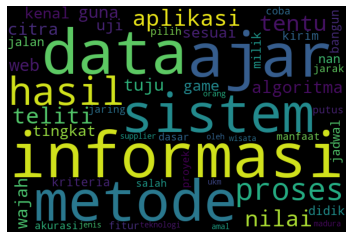

In [27]:
# Menampilkan hasil word cloud topik 1
draw_word_cloud(0)

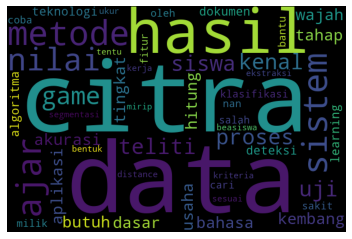

In [28]:
# Menampilkan hasil word cloud topik 2
draw_word_cloud(1)

# Clustering

## Dimentional reduction PCA
Principal component analysis (PCA) adalah suatu teknik analisis statistik multivariat. Bisa dibilang, inilah teknik analisis statistik yang paling populer sekarang. Biasanya, PCA digunakan dalam bidang pengenalan pola serta pemrosesan sinyal. \
PCA pada dasarnya merupakan dasar dari analisis data multivariat yang menerapkan metode proyeksi. Teknik analisis ini biasanya digunakan untuk meringkas tabel data multivariat dalam skala besar hingga bisa dijadikan kumpulan variabel yang lebih kecil atau indeks ringkasan. Dari situ, kemudian variabel dianalisis untuk mengetahui tren tertentu, klaster variabel, hingga outlier.

In [29]:
# melihat n_component terbaik
# dengan cumulative explained variance
pca = PCA().fit(tfidf)
cmv = pca.explained_variance_ratio_.cumsum()
print(cmv)
print(cmv.shape)

[0.03117084 0.05403736 0.07581619 0.09271298 0.108094   0.12206331
 0.1354671  0.14841807 0.16034348 0.17176095 0.18312135 0.19402789
 0.20447538 0.21473987 0.22446028 0.23412922 0.24349514 0.25269877
 0.26169629 0.27051081 0.27889662 0.28713929 0.29517369 0.30308701
 0.31081592 0.31847654 0.32593327 0.33327801 0.34058767 0.34780781
 0.35485385 0.36173159 0.36852029 0.37519117 0.38168396 0.3881305
 0.39450945 0.40075524 0.40687603 0.41295531 0.41895756 0.42492211
 0.43082108 0.43660962 0.44229705 0.44793168 0.45354172 0.4590164
 0.46446642 0.46987379 0.47522835 0.48049246 0.48574612 0.49095228
 0.49608584 0.50119965 0.50626906 0.51131993 0.51634892 0.5213285
 0.5262435  0.53108652 0.53591488 0.54070507 0.54547126 0.55020099
 0.55490648 0.55953241 0.56413989 0.56871466 0.57322849 0.57773641
 0.58221557 0.58668318 0.59112722 0.59552785 0.59991359 0.60427216
 0.60859249 0.61288021 0.61716049 0.62141644 0.62565306 0.62985911
 0.6340063  0.63813966 0.64226206 0.64635902 0.65044937 0.6545286

In [30]:
# proses reduksi dimensi
pca = PCA(n_components=235)
pca_df = pca.fit_transform(tfidf)
pca_df

array([[-0.05218214,  0.05348519, -0.09314245, ...,  0.01696582,
        -0.00149386,  0.0029904 ],
       [-0.07276618,  0.08072926, -0.11116606, ...,  0.00250301,
        -0.00330213,  0.00096884],
       [-0.08570516,  0.02131472, -0.0476219 , ..., -0.02169394,
        -0.0170491 ,  0.00164169],
       ...,
       [-0.08798513,  0.06499862, -0.09880111, ...,  0.02469851,
         0.00614299,  0.00523863],
       [-0.05955103,  0.01453667, -0.05406916, ..., -0.00089568,
        -0.00317958,  0.00306083],
       [-0.14941287, -0.16890726, -0.01884484, ...,  0.19865034,
         0.0263518 , -0.00136269]])

## Metode Elbow
Metode Elbow merupakan salah satu metode untuk menentukan jumlah cluster yang tepat melalui persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Jika nilai cluster pertama dengan nilai cluster kedua memberikan sudut dalam grafik atau nilainya mengalami penurunan paling besar maka jumlah nilai cluster tersebut yang tepat. Untuk mendapatkan perbandingannya adalah dengan menghitung Sum of Square Error (SSE) dari masing-masing nilai cluster. Karena semakin besar jumlah nilai cluster K, maka nilai SSE akan semakin kecil. 

$$S S E=\sum_{K=1}^{K} \sum_{X_{i}}\left|x_{i}-c_{k}\right|^{2}$$

Keterangan:\
${K}$ = _cluster_ ke-c\
$x_{i}$ = jarak data obyek ke-i\
$c_{k}$ = pusat _cluster_ ke-i

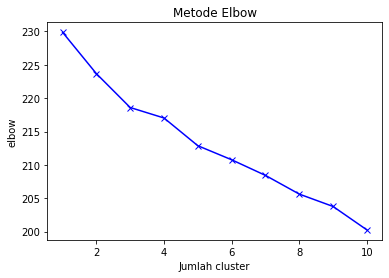

In [31]:
elbow = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=5)
  kmeans.fit(pca_df)
  elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow, 'bx-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('elbow')
plt.show()

### Mencari _cluster_ terbaik menggunakan metode elbow tidak berhasil karena posisi elbow tidak terlihat. Hal ini dikarenakan minimnya term.kata unik yang terdapat pada tugas tugas akhir manajemen.

## K-Means Clustering
K-Means Clustering merupakan algoritma yang efektif untuk menentukan cluster dalam sekumpulan data, di mana pada algortima tersebut dilakukan analisis kelompok yang mengacu pada pemartisian N objek ke dalam K kelompok (Cluster) berdasarkan nilai rata-rata (means) terdekat. Adapun persamaan yang sering digunakan dalam pemecahan masalah dalam menentukan jarak terdekat adalah persamaan Euclidean berikut :

$$d(p, q)=\sqrt{\left(p_{1}-q_{1}\right)^{2}+\left(p_{2}-q_{2}\right)^{2}+\left(p_{3}-q_{3}\right)^{2}}$$
Keterangan:\
_d_ = jarak obyek\
_p_ = data\
_q_ = centroid

In [32]:
# melakukan clustering menggunakan kmeans
# jumlah cluster yang digunakan adalah 2
kmeans = KMeans(n_clusters=2, random_state=5)
kmeans.fit(pca_df)
y_kmeans = kmeans.predict(pca_df)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

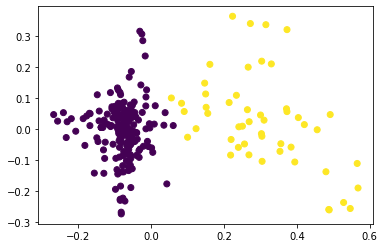

In [34]:
# menampilkan hasil clustering kmeans clustering
plt.scatter(pca_df[:, 0], pca_df[:, 8], c=y_kmeans)